$$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\Yv}{\mathbf{Y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\betav}{\mathbf{\beta}}
\newcommand{\gv}{\mathbf{g}}
\newcommand{\Hv}{\mathbf{H}}
\newcommand{\dv}{\mathbf{d}}
\newcommand{\Vv}{\mathbf{V}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\Sv}{\mathbf{S}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\Zv}{\mathbf{Z}}
\newcommand{\Norm}{\mathcal{N}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
\newcommand{\grad}{\mathbf{\nabla}}
\newcommand{\ebx}[1]{e^{\wv_{#1}^T \xv_n}}
\newcommand{\eby}[1]{e^{y_{n,#1}}}
\newcommand{\Tiv}{\mathbf{Ti}}
\newcommand{\Fv}{\mathbf{F}}
\newcommand{\ones}[1]{\mathbf{1}_{#1}}
$$

## The Wonderful World of ML - Session 5 Discussion: Trees

Let's start by taking a look a couple of simple trees. The data for the tree in **Figure 1.A** was taken from the **ISLR** package in **R** and can be found [here](https://github.com/MichaelSzczepaniak/WonderfulML/raw/master/data/HittersISLR.csv).  The data for the tree in **Figure 1.B** was originally downloaded from [here](http://www-bcf.usc.edu/~gareth/ISL/Heart.csv), but it has been replicated [here](https://github.com/MichaelSzczepaniak/WonderfulML/raw/master/data/Heart.csv) in case the original link goes away.

<img src="https://github.com/MichaelSzczepaniak/WonderfulML/raw/master/docs/graphics/Trees_03_Fig1.jpg">

Figure 1.A shows an example of a regression tree.  Figure 1.B shows an example of a classification tree.  While both of these trees are binary (only split 2 ways at each non-leaf node), they can contain more than 2 splits at any node as shown in **Figure 2.** below.

<img src="https://github.com/MichaelSzczepaniak/WonderfulML/raw/master/docs/graphics/Trees_04_Fig2.jpg">

Besides being represented as a flowchart, Figure 2. illustrates each node being split by a catagorical variable instead of being split on a continuous variable as shown in Figure 1.A and parts of Figure 1B.

One of the main strengths of decision trees is their interpretablitily.  Once we have trained/built our tree, to make a prediction with new data, all we have to do is follow the path from the root node to a leaf node.

### Make a prediction with a tree

#### Example 1.

Assume that the leaf nodes in Figure 1.A are log (base 10) values of salaries for baseball players.  What would the model predict for the salary of a player that has been in the league 7 years and had 113 hits?

#### Answer 1.

Starting at the top (root) node of the tree in Figure 1.A, we traverse right because 7 > 4.5.  This brings us to the **Hits** node where we split left because 113 < 117.5.  This brings us to the leaf with value of **6.0**.  Since this is the base-10 log of the salary, our prediction would be:

In [3]:
print("predicted salary = ${:.2f}".format(10**(6.0)))

predicted salary = $1000000.00


### Building Trees

A tree represents a recipe for how to slice up feature space.  The better the recipe, the better the predictions the tree is able to make.  So how do we build trees that make good predictions on test data?

#### Cost Functions

As we've seen with other machine learning methods, after establishing the math around a model, we typically propose some kind of cost function we try to minimize (e.g. residual sum of squares) or an objective function which we try to maximize (e.g. log likelihood).

#### Regression Trees

Like linear regression, the residual sum of squares (RSS) is well suited for training regression trees.  Also similar to linear regression models, we need to select predictors that matter and discard ones that don't.  The way this is typically done for regression trees is to grow a full tree with all the predictors and follow this by applying a technique called **cost complexity pruning** to remove branches that aren't as important.

#### Classification Trees

#### Overfitting

Like other forms of machine learning, trees can 





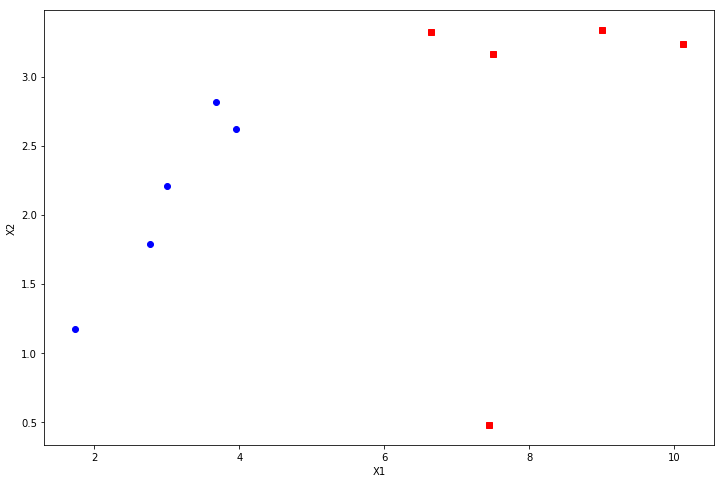

In [1]:
import sys
# https://stackoverflow.com/questions/4383571/importing-files-from-different-folder
sys.path.insert(0, '../../Python/')
import BinaryDecisionTree as b
import matplotlib.pyplot as plt
import numpy as np
# test data from http://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python/
dataset = np.array([[2.771244718,1.784783929,0],
                    [1.728571309,1.169761413,0],
                    [3.678319846,2.81281357,0],
                    [3.961043357,2.61995032,0],
                    [2.999208922,2.209014212,0],
                    [7.497545867,3.162953546,1],
                    [9.00220326,3.339047188,1],
                    [7.444542326,0.476683375,1],
                    [10.12493903,3.234550982,1],
                    [6.642287351,3.319983761,1]])

# Visualize the test data
d0_x1 = dataset[:5,0]
d0_x2 = dataset[:5,1]
d1_x1 = dataset[5:,0]
d1_x2 = dataset[5:,1]
fig = plt.figure(figsize=(12, 8))  # width, height
ax = fig.add_subplot(111)
ax.plot(d0_x1, d0_x2, 'bo', label='class 0')
ax.plot(d1_x1, d1_x2, 'rs', label='class 1')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
fig

In [2]:
split = b.get_split(dataset)
print('Split: [X%d < %.3f]' % ((split['index']+1), split['value']))

X1 < 2.771 Gini=0.494
X1 < 1.729 Gini=0.500
X1 < 3.678 Gini=0.408
X1 < 3.961 Gini=0.278
X1 < 2.999 Gini=0.469
X1 < 7.498 Gini=0.408
X1 < 9.002 Gini=0.469
X1 < 7.445 Gini=0.278
X1 < 10.125 Gini=0.494
X1 < 6.642 Gini=0.000
X2 < 1.785 Gini=1.000
X2 < 1.170 Gini=0.494
X2 < 2.813 Gini=0.640
X2 < 2.620 Gini=0.819
X2 < 2.209 Gini=0.934
X2 < 3.163 Gini=0.278
X2 < 3.339 Gini=0.494
X2 < 0.477 Gini=0.500
X2 < 3.235 Gini=0.408
X2 < 3.320 Gini=0.469
Split: [X1 < 6.642]


In [3]:
tree = b.build_tree(dataset, 1, 1)
b.print_tree(tree)

X1 < 2.771 Gini=0.494
X1 < 1.729 Gini=0.500
X1 < 3.678 Gini=0.408
X1 < 3.961 Gini=0.278
X1 < 2.999 Gini=0.469
X1 < 7.498 Gini=0.408
X1 < 9.002 Gini=0.469
X1 < 7.445 Gini=0.278
X1 < 10.125 Gini=0.494
X1 < 6.642 Gini=0.000
X2 < 1.785 Gini=1.000
X2 < 1.170 Gini=0.494
X2 < 2.813 Gini=0.640
X2 < 2.620 Gini=0.819
X2 < 2.209 Gini=0.934
X2 < 3.163 Gini=0.278
X2 < 3.339 Gini=0.494
X2 < 0.477 Gini=0.500
X2 < 3.235 Gini=0.408
X2 < 3.320 Gini=0.469
[X1 < 6.642]
 [0.0]
 [1.0]


In [4]:
tree2 = b.build_tree(dataset, 2, 1)
b.print_tree(tree2)

X1 < 2.771 Gini=0.494
X1 < 1.729 Gini=0.500
X1 < 3.678 Gini=0.408
X1 < 3.961 Gini=0.278
X1 < 2.999 Gini=0.469
X1 < 7.498 Gini=0.408
X1 < 9.002 Gini=0.469
X1 < 7.445 Gini=0.278
X1 < 10.125 Gini=0.494
X1 < 6.642 Gini=0.000
X2 < 1.785 Gini=1.000
X2 < 1.170 Gini=0.494
X2 < 2.813 Gini=0.640
X2 < 2.620 Gini=0.819
X2 < 2.209 Gini=0.934
X2 < 3.163 Gini=0.278
X2 < 3.339 Gini=0.494
X2 < 0.477 Gini=0.500
X2 < 3.235 Gini=0.408
X2 < 3.320 Gini=0.469
X1 < 2.771 Gini=0.000
X1 < 1.729 Gini=0.000
X1 < 3.678 Gini=0.000
X1 < 3.961 Gini=0.000
X1 < 2.999 Gini=0.000
X2 < 1.785 Gini=0.000
X2 < 1.170 Gini=0.000
X2 < 2.813 Gini=0.000
X2 < 2.620 Gini=0.000
X2 < 2.209 Gini=0.000
X1 < 7.498 Gini=0.000
X1 < 9.002 Gini=0.000
X1 < 7.445 Gini=0.000
X1 < 10.125 Gini=0.000
X1 < 6.642 Gini=0.000
X2 < 3.163 Gini=0.000
X2 < 3.339 Gini=0.000
X2 < 0.477 Gini=0.000
X2 < 3.235 Gini=0.000
X2 < 3.320 Gini=0.000
[X1 < 6.642]
 [X1 < 2.771]
  [0.0]
  [0.0]
 [X1 < 7.498]
  [1.0]
  [1.0]


In [6]:
#  predict with a stump
stump = {'index': 0, 'right': 1, 'value': 6.642287351, 'left': 0}
for row in dataset:
    prediction = b.predict(stump, row)
    print('Expected=%d, Got=%d' % (row[-1], prediction))

Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
